# TUGAS KELOMPOK PRAKTIKUM PEMBELAJARAN MESIN RB MODUL 3
NAMA KELOMPOK :
* 1. Dede Masita_121450007
* 2. Muhammad Kaisar Firdaus_121450135
* 3. Sella Dianka Fitri_121450043
* 4. Rizky Adrian Bennovry_121450073
* 5. Ayu Erlinawati_121450025
* 6. Saiful Haris Muhammad_121450115


## EDA

Informasi Dataset:

Setiap kolom menyediakan informasi khusus tentang pasien, penerimaan mereka, dan layanan kesehatan yang diberikan, membuat dataset ini cocok untuk berbagai tugas analisis data dan pemodelan dalam domain kesehatan. Berikut penjelasan singkat tentang setiap kolom dalam dataset ini -

* Name: Kolom ini mencerminkan nama pasien yang terkait dengan catatan kesehatan.

* Age: Usia pasien pada saat penerimaan, diungkapkan dalam tahun.

* Gender: Menunjukkan jenis kelamin pasien, baik "Laki-laki" atau "Perempuan."

* Blood Type: Golongan darah pasien, yang dapat menjadi salah satu golongan darah umum (misalnya, "A+", "O-", dll.).

* Medical Condition: Kolom ini menentukan kondisi medis utama atau diagnosis yang terkait dengan pasien, seperti "Diabetes," "Hipertensi," "Asma," dan lainnya.

* Date of Admission: Tanggal pasien diterima di fasilitas kesehatan.

* Doctor: Nama dokter yang bertanggung jawab atas perawatan pasien selama penerimaan mereka.

* Hospital: Mengidentifikasi fasilitas kesehatan atau rumah sakit tempat pasien diterima.

* Insurance Provider: Kolom ini menunjukkan penyedia asuransi pasien, yang dapat menjadi salah satu opsi, termasuk "Aetna," "Blue Cross," "Cigna," "UnitedHealthcare," dan "Medicare."

* Billing Amount: Jumlah uang yang ditagihkan untuk layanan kesehatan pasien selama penerimaan mereka. Ini diungkapkan sebagai angka desimal.

* Room Number: Nomor ruangan tempat pasien diakomodasi selama penerimaan mereka.

* Admission type: Menentukan jenis penerimaan, yang dapat "Darurat," "Elektif," atau "Penting," mencerminkan keadaan penerimaan.

* Discharge Type: Tanggal pasien keluar dari fasilitas kesehatan, berdasarkan tanggal penerimaan dan jumlah hari acak dalam rentang yang realistis.

* Medication: Mengidentifikasi obat yang diresepkan atau diberikan kepada pasien selama penerimaan mereka. Contoh termasuk "Aspirin," "Ibuprofen," "Penicillin," "Paracetamol," dan "Lipitor."

* Test Result : Mendeskripsikan hasil tes medis yang dilakukan selama penerimaan pasien. Nilai mungkin termasuk "Normal," "Abnormal," atau "Tidak jelas," mengindikasikan hasil tes.

In [ ]:
# Langkah Pertama yang kita lakukan adalah mengimport package package yang akan dibutuhkan
import numpy as np #NumPy digunakan untuk operasi numerik dan manipulasi array.
import pandas as pd #Pandas digunakan untuk manipulasi dan analisis data
import matplotlib.pyplot as plt #Matplotlib digunakan untuk membuat visualisasi data
import seaborn as sns #membuat visualisasi statistik yang menarik
import plotly.graph_objects as go #Plotly digunakan untuk membuat visualisasi interaktif
import plotly.offline as pyo # Modul ini memungkinkan untuk membuat visualisasi Plotly secara offline.
import plotly.io as pio #Modul ini memberikan fungsi input/output untuk Plotly.
import sklearn #menyediakan algoritma machine learning dan alat bantu untuk analisis data.
import plotly.express as ex # membuat visualisasi sederhana dengan Plotly.
import warnings #mengelola peringatan atau pesan peringatan selama eksekusi kode.
warnings.filterwarnings('ignore') #Mengatur filter peringatan untuk mengabaikan peringatan selama eksekusi kode

In [ ]:
df = pd.read_csv('/content/healthcare_dataset.csv') #Selanjutnya kita baca dataset dalam bentuk file.csv
df.info() #digunakan untuk menampilkan informasi nilai null dan tipe data setiap kolomnya

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                10000 non-null  object 
 1   Age                 10000 non-null  int64  
 2   Gender              10000 non-null  object 
 3   Blood Type          10000 non-null  object 
 4   Medical Condition   10000 non-null  object 
 5   Date of Admission   10000 non-null  object 
 6   Doctor              10000 non-null  object 
 7   Hospital            10000 non-null  object 
 8   Insurance Provider  10000 non-null  object 
 9   Billing Amount      10000 non-null  float64
 10  Room Number         10000 non-null  int64  
 11  Admission Type      10000 non-null  object 
 12  Discharge Date      10000 non-null  object 
 13  Medication          10000 non-null  object 
 14  Test Results        10000 non-null  object 
dtypes: float64(1), int64(2), object(12)
memory usage: 1.1+

In [ ]:
df.head() #menampilkan 5 data teratas

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Tiffany Ramirez,81,Female,O-,Diabetes,2022-11-17,Patrick Parker,Wallace-Hamilton,Medicare,37490.983364,146,Elective,2022-12-01,Aspirin,Inconclusive
1,Ruben Burns,35,Male,O+,Asthma,2023-06-01,Diane Jackson,"Burke, Griffin and Cooper",UnitedHealthcare,47304.064845,404,Emergency,2023-06-15,Lipitor,Normal
2,Chad Byrd,61,Male,B-,Obesity,2019-01-09,Paul Baker,Walton LLC,Medicare,36874.896997,292,Emergency,2019-02-08,Lipitor,Normal
3,Antonio Frederick,49,Male,B-,Asthma,2020-05-02,Brian Chandler,Garcia Ltd,Medicare,23303.322092,480,Urgent,2020-05-03,Penicillin,Abnormal
4,Mrs. Brandy Flowers,51,Male,O-,Arthritis,2021-07-09,Dustin Griffin,"Jones, Brown and Murray",UnitedHealthcare,18086.344184,477,Urgent,2021-08-02,Paracetamol,Normal


In [ ]:
#sebelumnya kita cek dulu apakah ada nilai null dari setiap atributnya
#proses ini masuk kedalam pre-processing
df.isna().sum()

Name                  0
Age                   0
Gender                0
Blood Type            0
Medical Condition     0
Date of Admission     0
Doctor                0
Hospital              0
Insurance Provider    0
Billing Amount        0
Room Number           0
Admission Type        0
Discharge Date        0
Medication            0
Test Results          0
dtype: int64

Seperti yang terlihat di atas bahwa tidak ada nilai null atau nilai yang hilang, sehingga dataset dapat langsung digunakan dalam pemodelan.

In [ ]:
df.describe() #fungsi ini menunjukkan deskripsi statistik data dari kolom bertipe numerik

,Age,Billing Amount,Room Number
count,10000.000000,10000.000000,10000.000000
mean,51.452200,25516.806778,300.082000
std,19.588974,14067.292709,115.806027
min,18.000000,1000.180837,101.000000
25%,35.000000,13506.523967,199.000000
50%,52.000000,25258.112566,299.000000
75%,68.000000,37733.913727,400.000000
max,85.000000,49995.902283,500.000000


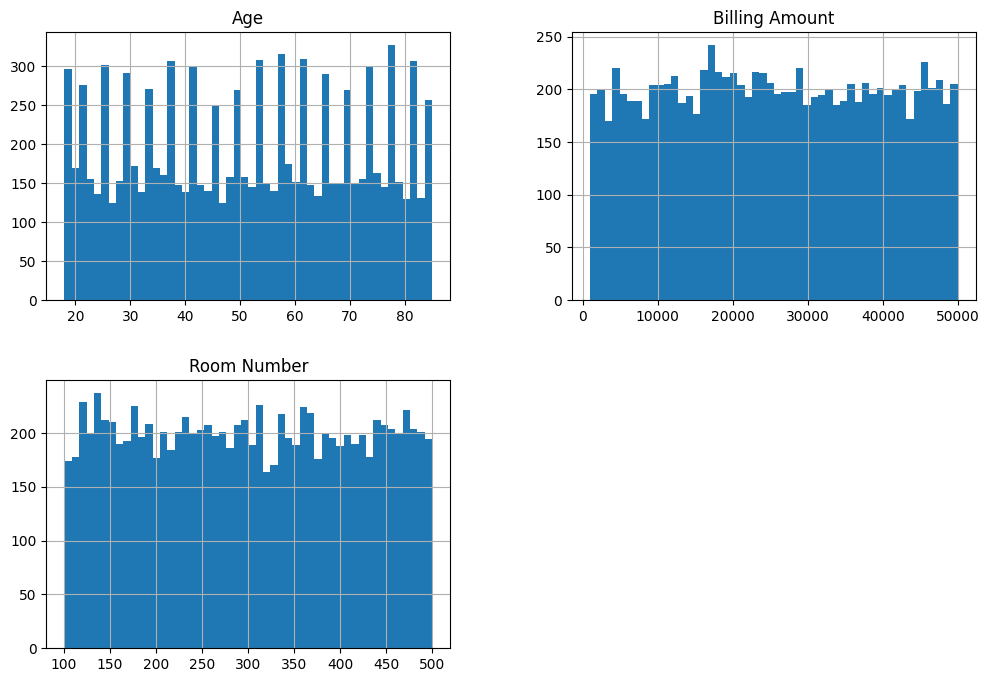

In [ ]:
# Histogram
# Code ini digunakan untuk menampilkan visualisasi dari setiap atribut numerik
df.hist(bins=50, figsize=(12,8))
plt.show()

Dari hasil visualisasi diatas, dapat diketahui bahwa kolom "Age" memiliki interval yang cukup tinggi sedangkan "Billing Amount" dan "Room Number" memiliki Interval yang cukup rendah.

In [ ]:
# Selanjutnya akan dipilih kolom-kolom bertipe data kategorik
cols = ['Gender','Blood Type', 'Medical Condition',
        'Insurance Provider', 'Admission Type',
        'Medication', 'Test Results']

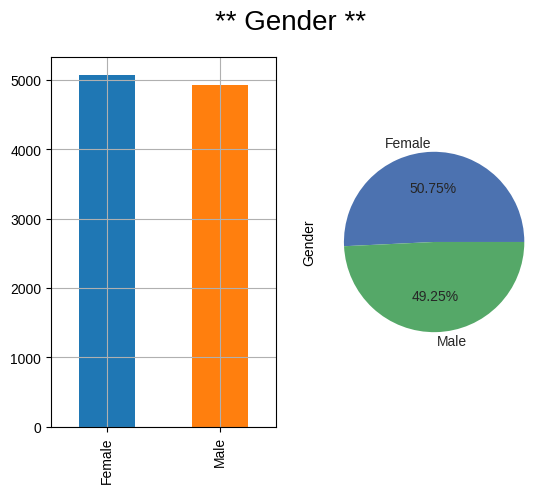

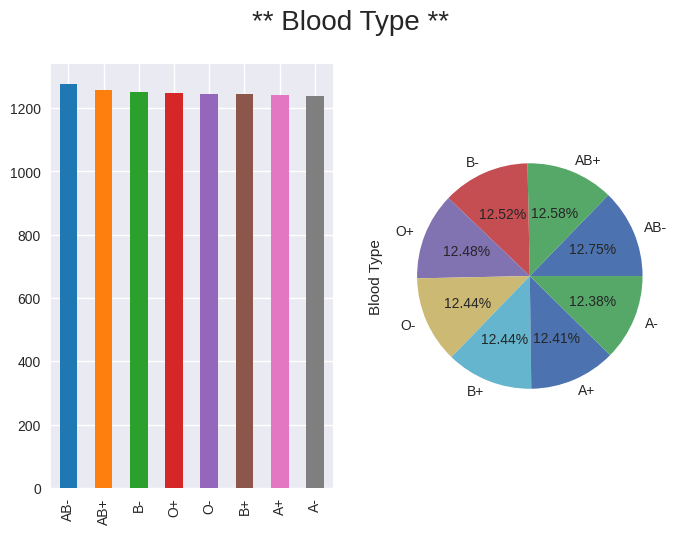

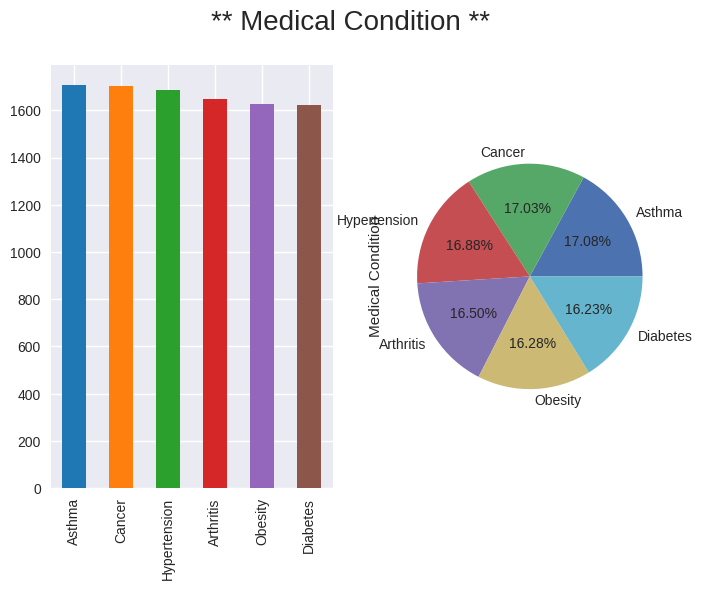

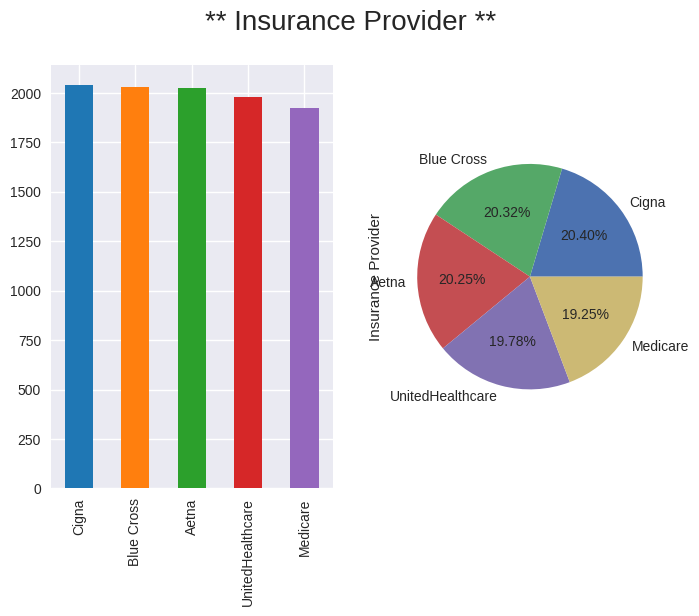

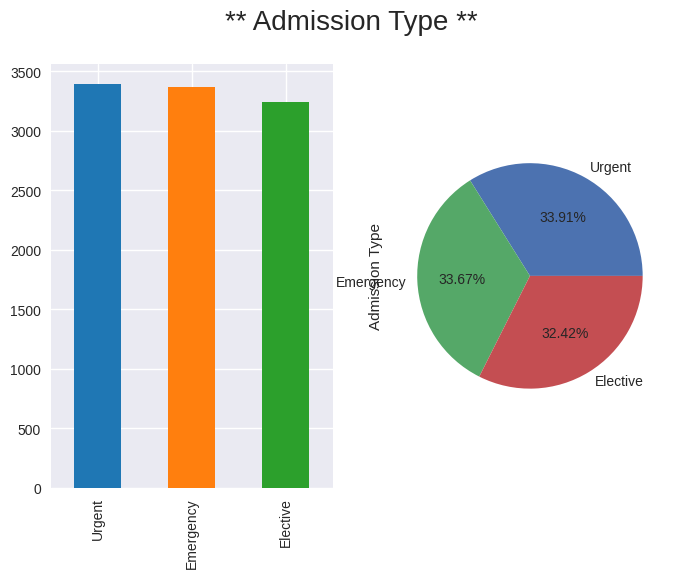

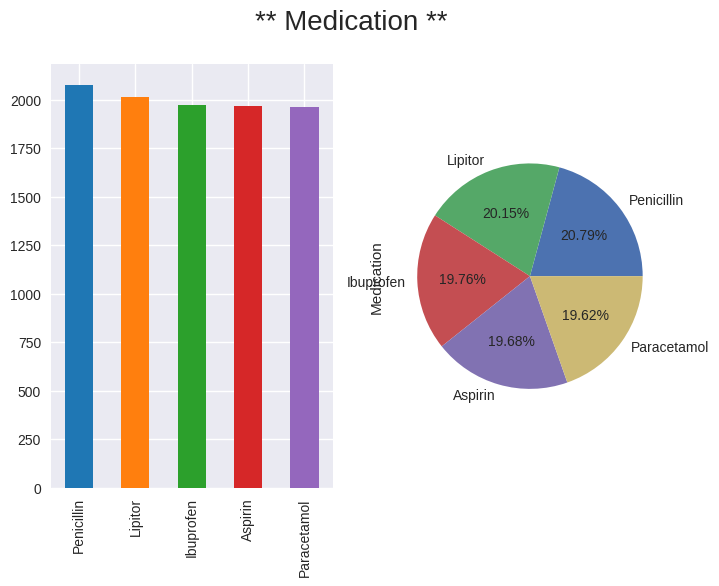

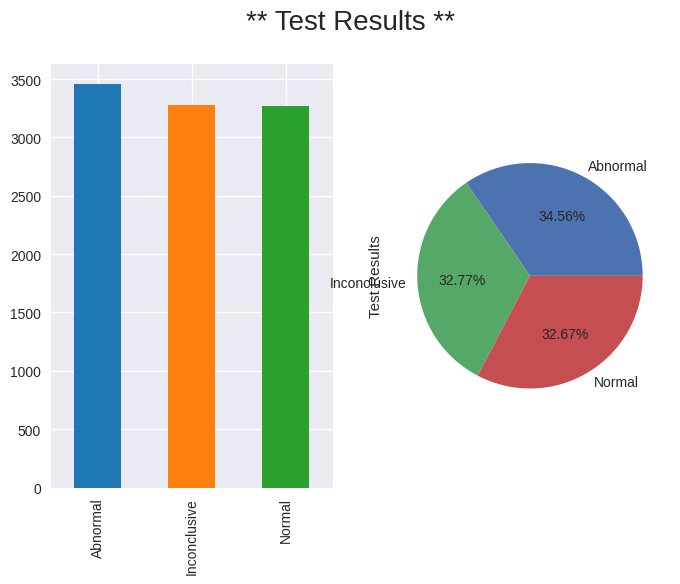

In [ ]:
# Disini kami menampilkan visualisasi dari kolom-kolom kategorik tersebut dalam bentuk barchart dan Piechart
for i in cols: #Loop ini iterasi melalui setiap elemen dalam list cols

    if i == 'Gender': # memeriksa apakah kolom saat ini adalah 'Gender'. Jika benar, maka dua subplot akan dibuat untuk visualisasi data jenis kelamin.

        fig, ax = plt.subplots(1, 2) #Membuat objek gambar dan subplot dengan dua kolom untuk membuat dua visualisasi sejajar.
        fig.suptitle('** Gender **', fontsize=20) #Menambahkan judul gambar dengan teks '** Gender **'.
        plt.style.use('seaborn')
        plt.subplot(1,2,1) #Memilih subplot pertama untuk visualisasi bar.
        df['Gender'].value_counts().plot(kind='bar',color=sns.color_palette("tab10")) # Menggunakan pandas untuk menghitung nilai yang unik dan membuat diagram batang dari jumlah setiap nilai jenis kelamin,
        plt.subplot(1,2,2) #Memilih subplot kedua untuk visualisasi pie.
        df['Gender'].value_counts().plot(kind='pie',autopct="%.2f%%") #Menggunakan pandas untuk membuat diagram lingkaran dari proporsi setiap nilai jenis kelamin, dengan label presentase ditampilkan.
        plt.show() #Menampilkan gambar hasil visualisasi.

    else:
        fig, ax = plt.subplots(1, 2)
        fig.suptitle('** ' + i + ' **', fontsize=20) #Menambahkan judul gambar dengan teks yang sesuai dengan nama kolom saat ini.
        plt.style.use('seaborn')
        plt.subplot(1,2,1)
        df[i].value_counts().plot(kind='bar',color=sns.color_palette("tab10")) #: Untuk kolom selain 'Gender', visualisasi bar dibuat dengan jumlah setiap nilai dalam kolom.
        plt.subplot(1,2,2)
        df[i].value_counts().plot(kind='pie',autopct="%.2f%%") # Untuk kolom selain 'Gender', visualisasi pie dibuat dengan proporsi setiap nilai, dengan label presentase.
        plt.show() # Menampilkan gambar hasil visualisasi.


Dari visualisasi ditas, kita dapat memahami perbedaan setiap kategori pada masing-masing kolom/attribut.
Barchart berwarna menunjukkan jumlah dari setiap kategori pada kelas sedangkan piechart menampilkan persentase dari setiap kategori.

In [ ]:
# Selanjutnya akan dipilih kolom-kolom bertipe data kategorik
cols = ['Gender','Blood Type', 'Medical Condition','Doctor',
        'Hospital', 'Insurance Provider', 'Admission Type',
        'Medication', 'Test Results']

In [ ]:
import plotly.graph_objects as go
import plotly.offline as pyo

In [ ]:
# Highest "Features" according to Billing Amount

for i in cols: #Loop ini iterasi melalui setiap elemen dalam list cols.

    if i == 'Gender':
#kondisi yang memeriksa apakah kolom saat ini adalah 'Gender'. Jika benar, maka visualisasi khusus untuk 'Gender' akan dibuat.
        char_bar = df.groupby(['Gender'])[['Billing Amount']].sum().reset_index() # Mengelompokkan data berdasarkan jenis kelamin dan menghitung total jumlah tagihan (Billing Amount) untuk setiap jenis kelamin.
        char_bar = char_bar.sort_values(by=("Billing Amount"), ascending=False) #Mengurutkan DataFrame berdasarkan jumlah tagihan secara turun.

        top = char_bar.head(10) #Mengambil 10 entri pertama setelah diurutkan.
        fig = go.Figure() #Membuat objek Figure dari Plotly
        fig.add_trace(go.Bar(x=top['Gender'], y=top["Billing Amount"])) #Menambahkan trace berupa diagram batang ke objek Figure

        fig.update_layout(title="Highest Gender According to " + 'Billing Amount', #Mengupdate layout dari diagram batang, termasuk judul, label sumbu, dan warna latar.
                          xaxis_title='Gender', #menambahkan judul
                          yaxis_title= "Billing Amount", # menambahkan judul
                          plot_bgcolor='white', # warna latar
                          paper_bgcolor='white',
                          font=dict(color='black'))

        pyo.init_notebook_mode(connected=True) #Menginisialisasi mode notebook untuk plotly.
        pyo.iplot(fig) #Menampilkan diagram batang interaktif di notebook.

    else:
        char_bar = df.groupby([i])[['Billing Amount']].sum().reset_index() #Mengelompokkan data berdasarkan nilai unik dalam kolom i
        char_bar = char_bar.sort_values(by=("Billing Amount"), ascending=False) # Mengurutkan DataFrame berdasarkan jumlah tagihan secara turun.

        top = char_bar.head(10) #Mengambil 10 entri pertama setelah diurutkan.
        fig = go.Figure() # Membuat objek Figure dari Plotly.
        fig.add_trace(go.Bar(x=top[i], y=top['Billing Amount'])) #Menambahkan trace berupa diagram batang ke objek Figure,

        fig.update_layout(title="Highest " + i + " According to Billing Amount", # Mengupdate layout dari diagram batang, termasuk judul, label sumbu, dan warna latar.
                          xaxis_title= i,
                          yaxis_title= "Billing Amount",
                          plot_bgcolor='white',
                          paper_bgcolor='white',
                          font=dict(color='black'))

        pyo.init_notebook_mode(connected=True) #Menginisialisasi mode notebook untuk plotly.
        pyo.iplot(fig) #Menampilkan diagram batang interaktif di notebook.



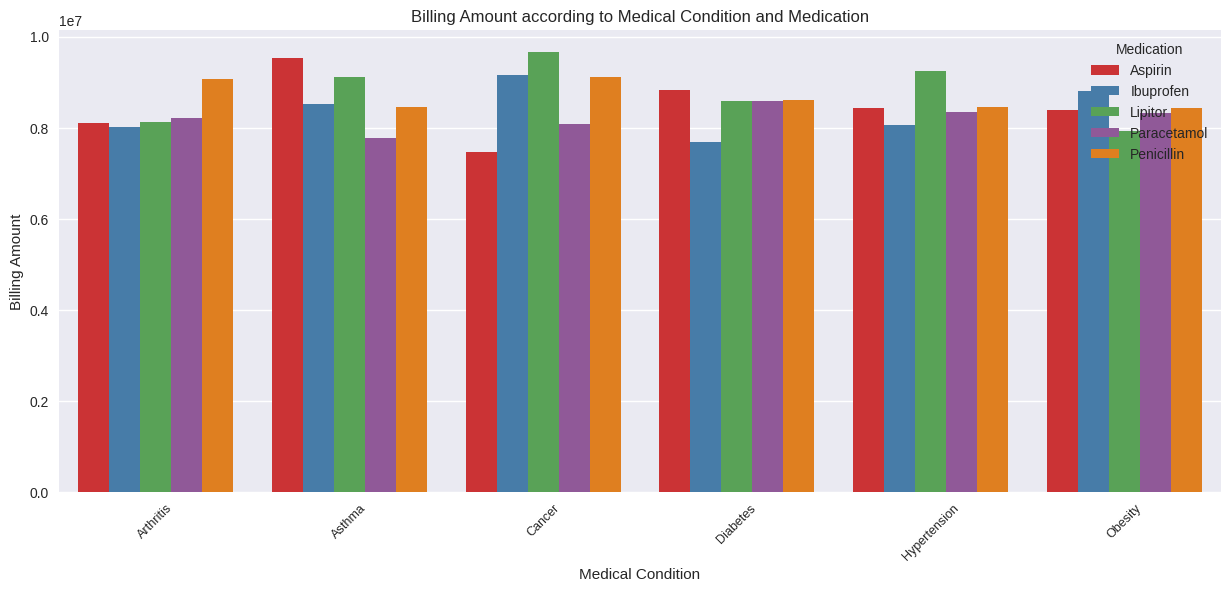

In [ ]:
df_trans = df.groupby(['Medical Condition', 'Medication'])[['Billing Amount']].sum().reset_index()
#Menggunakan metode groupby pada DataFrame df untuk mengelompokkan data berdasarkan kolom 'Medical Condition' dan 'Medication'.
plt.figure(figsize=(15,6)) #Membuat objek gambar dengan ukuran 15x6 inci.
sns.barplot(x=df_trans['Medical Condition'], y=df_trans['Billing Amount'], hue=df_trans['Medication'], ci=None, palette="Set1") #Menggunakan seaborn untuk membuat diagram batang.
plt.title("Billing Amount according to Medical Condition and Medication") #Menambahkan judul diagram.
plt.ylabel("Billing Amount") #Memberi label sumbu y sebagai "Billing Amount".
plt.xticks(rotation=45, fontsize = 9) #Memutar label sumbu x sebesar 45 derajat untuk meningkatkan legibilitas dan mengatur ukuran font.
plt.show() #Menampilkan diagram batang.

Visualisasi diatas menampilkan barplot Billing amount terhadap berbagai medical condotion, dimana setiap medical condition memiliki beberapa kategori berdasarkan obat-obatan yang digunakan.

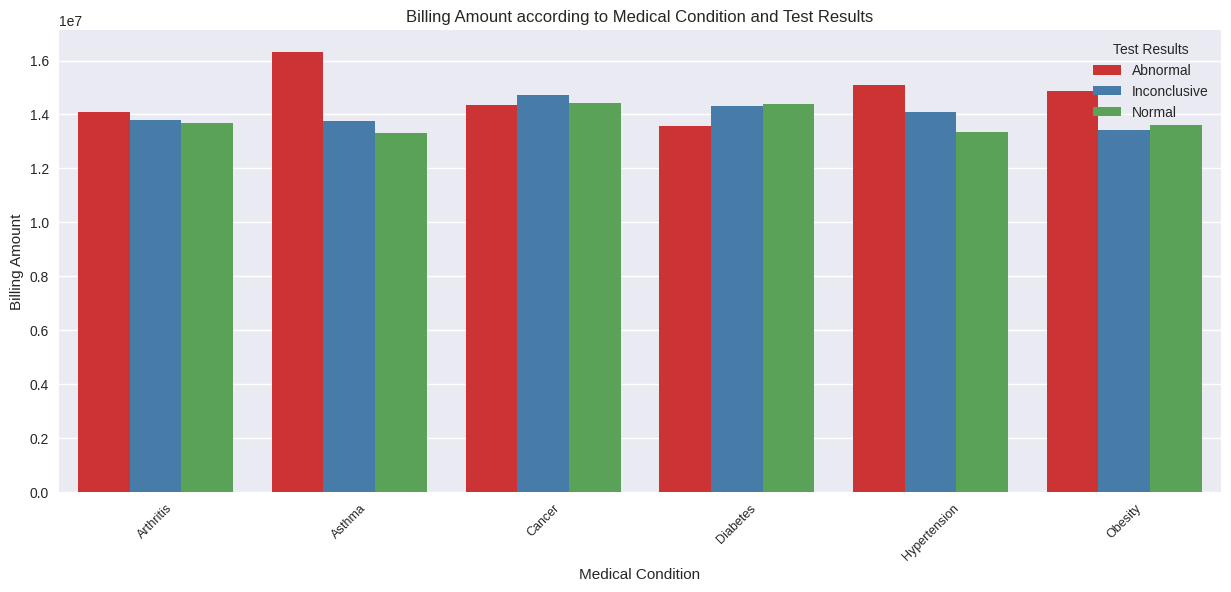

In [ ]:
# Billing Amount according to Medical Condition and Test Results
df_trans = df.groupby(['Medical Condition', 'Test Results'])[['Billing Amount']].sum().reset_index()
# Menggunakan metode groupby pada DataFrame df untuk mengelompokkan data berdasarkan kolom 'Medical Condition' dan 'Medication'.
plt.figure(figsize=(15,6)) #  Membuat objek gambar dengan ukuran 15x6 inci.
sns.barplot(x=df_trans['Medical Condition'], y=df_trans['Billing Amount'], hue=df_trans['Test Results'], ci=None, palette="Set1") # Menambahkan judul diagram.
plt.title("Billing Amount according to Medical Condition and Test Results") #  Menambahkan judul diagram.
plt.ylabel("Billing Amount") # : Memberi label sumbu y sebagai "Billing Amount".
plt.xticks(rotation=45, fontsize = 9) # Memutar label sumbu x sebesar 45 derajat untuk meningkatkan legibilitas dan mengatur ukuran font.
plt.show() # Menampilkan diagram batang.

Visualisasi diatas menampilkan barplot Billing amount terhadap berbagai medical condotion, dimana setiap medical condition memiliki beberapa kategori berdasarkan hasil tes yang didapatkan.

In [ ]:
df = df[[ 'Age', 'Gender', 'Blood Type', 'Medical Condition', 'Admission Type', 'Medication', 'Test Results']] #Memilih subset kolom dari DataFrame
for col in df.columns: # Memulai loop for yang akan melakukan iterasi melalui setiap kolom dalam DataFrame df.
    print(col, df[col].nunique()) #  Mencetak nama kolom dan jumlah nilai unik (jumlah kategori unik) dalam kolom tersebut.

Age 68
Gender 2
Blood Type 8
Medical Condition 6
Admission Type 3
Medication 5
Test Results 3


Dari code diatas, ditampilkan jumlah kelas kategori pada setiap kolomnya, yaitu umur (68 kategori), gender (2 kategori) dan seterusnya.

# MODELING

### Decision Tree

In [ ]:
# Pertama kita import library yang dibutuhkan
import numpy as np # numPy adalah pustaka Python untuk komputasi numerik
import pandas as pd # Pandas adalah pustaka Python untuk manipulasi dan analisis data
import matplotlib.pyplot as plt # Matplotlib adalah pustaka untuk membuat visualisasi grafik,
import seaborn as sns # Seaborn adalah pustaka untuk visualisasi data yang dibangun di atas Matplotlib
import plotly.graph_objects as go # Plotly adalah pustaka untuk membuat visualisasi interaktif, dan graph_objects memberikan kontrol lebih lanjut atas elemen-elemen grafik.
import plotly.offline as pyo # igunakan untuk membuat plot Plotly secara offline
import plotly.io as pio # memberikan fungsionalitas untuk mengelola input/output Plotly.
import sklearn # Mengimpor modul utama dari scikit-learn.
import plotly.express as ex #Plotly Express adalah antarmuka tingkat tinggi untuk membuat visualisasi Plotly yang lebih mudah digunakan.
from sklearn.model_selection import train_test_split #  Fungsi ini digunakan untuk membagi data menjadi set pelatihan dan pengujian.
from sklearn.tree import DecisionTreeClassifier , plot_tree #Ini digunakan untuk membangun dan menggambarkan pohon keputusan.
from sklearn.metrics import accuracy_score #  Fungsi ini digunakan untuk mengukur akurasi model klasifikasi.
import warnings #Mengimpor modul warnings untuk mengelola pemberitahuan atau peringatan.
warnings.filterwarnings('ignore') # Mengatur filter peringatan untuk mengabaikan pemberitahuan

In [ ]:
df = pd.read_csv('/content/healthcare_dataset.csv')

df['Date of Admission']= pd.to_datetime(df['Date of Admission'])
#Mengubah kolom 'Date of Admission' menjadi tipe data datetime menggunakan fungsi to_datetime dari Pandas.
df['Discharge Date']= pd.to_datetime(df['Discharge Date'])
#Mengubah kolom 'Discharge Date' menjadi tipe data datetime menggunakan fungsi to_datetime dari Pandas.
df['Days hospitalized'] = df['Discharge Date'] - df['Date of Admission']
#  Membuat kolom baru dengan nama 'Days hospitalized', yang berisi selisih antara tanggal penerimaan dan tanggal pulang.
df['Days hospitalized'] = df['Days hospitalized'].astype(int) / 86400000000000 # Mengubah nilai dalam kolom 'Days hospitalized' menjadi jumlah hari.

df.head() #Menampilkan lima baris pertama dari DataFrame

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results,Days hospitalized
0,Tiffany Ramirez,81,Female,O-,Diabetes,2022-11-17,Patrick Parker,Wallace-Hamilton,Medicare,37490.983364,146,Elective,2022-12-01,Aspirin,Inconclusive,14.0
1,Ruben Burns,35,Male,O+,Asthma,2023-06-01,Diane Jackson,"Burke, Griffin and Cooper",UnitedHealthcare,47304.064845,404,Emergency,2023-06-15,Lipitor,Normal,14.0
2,Chad Byrd,61,Male,B-,Obesity,2019-01-09,Paul Baker,Walton LLC,Medicare,36874.896997,292,Emergency,2019-02-08,Lipitor,Normal,30.0
3,Antonio Frederick,49,Male,B-,Asthma,2020-05-02,Brian Chandler,Garcia Ltd,Medicare,23303.322092,480,Urgent,2020-05-03,Penicillin,Abnormal,1.0
4,Mrs. Brandy Flowers,51,Male,O-,Arthritis,2021-07-09,Dustin Griffin,"Jones, Brown and Murray",UnitedHealthcare,18086.344184,477,Urgent,2021-08-02,Paracetamol,Normal,24.0


In [ ]:
# Kolom yang tidak diperlukan - [Name, Date, Doctor, Hospital, Insurance, amount, room, discharge]
# Salin kolom yang diperlukan ke dalam df2 untuk menyimpan data utama dalam df
df2 = df[[ 'Age', 'Gender', 'Blood Type', 'Medical Condition', 'Admission Type', 'Medication', 'Test Results','Days hospitalized']]

# Nilai unik disetiap kolom
for col in df2.columns:
    print(col, df2[col].nunique())

Age 68
Gender 2
Blood Type 8
Medical Condition 6
Admission Type 3
Medication 5
Test Results 3
Days hospitalized 30


In [ ]:
# Machine learning bekerja pada angka, jadi kita perlu mengonversi kolom-kolom
# Mengonversi data kategorikal menjadi data numerik menggunakan LabelEncoder
from sklearn.preprocessing import LabelEncoder #Mengimpor kelas LabelEncoder dari modul preprocessing di scikit-learn.
lc = LabelEncoder() # Objek ini akan digunakan untuk mengonversi nilai dalam kolom menjadi numerik.
cols = ['Gender', 'Blood Type', 'Medical Condition', 'Admission Type', 'Medication', 'Test Results']  #Menyimpan nama kolom-kolom yang akan diubah dari data kategorikal menjadi data numerik dalam list cols.
for i in cols:
  df2[i]=lc.fit_transform(df2[i]) #mengonversi nilai dalam kolom menjadi numerik.
df2.head() #Menampilkan lima baris pertama dari DataFrame df2 setelah transformasi.

,Age,Gender,Blood Type,Medical Condition,Admission Type,Medication,Test Results,Days hospitalized
0,81,0,7,3,0,0,1,14.0
1,35,1,6,1,1,2,2,14.0
2,61,1,5,5,1,2,2,30.0
3,49,1,5,1,2,4,0,1.0
4,51,1,7,0,2,3,2,24.0


In [ ]:
# Menetapkan variabel dependen dan independen
# 'Test Results' adalah kolom output dan input adalah kolom-kolom lainnya
X=df2.drop(['Test Results'],axis=1)
y=df2['Test Results']

# Membagi data menjadi dua bagian: Data Pelatihan dan Data Uji
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

# Bentuk dari data pelatihan dan uji
X_train.shape, X_test.shape, y_train.shape, y_test.shape

# Menggunakan Algoritma Machine Learning Decision Tree Classifier
model = DecisionTreeClassifier()
model.fit(X_train,y_train)

# Mendapatkan skor dari model
score_of_model = model.score(X_test,y_test)

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
# Menguji hasil akurasi
print("Score Of Model =",score_of_model)
print("Accuracy =", accuracy)

Score Of Model = 0.339
Accuracy = 0.339


Jadi dapat disimpulkan bahwa dengan menggunakan model decision tree maka akan didapat nilai akurasi 0.3415 dan nilai model 0.3415.

<Figure size 10000x10000 with 0 Axes>

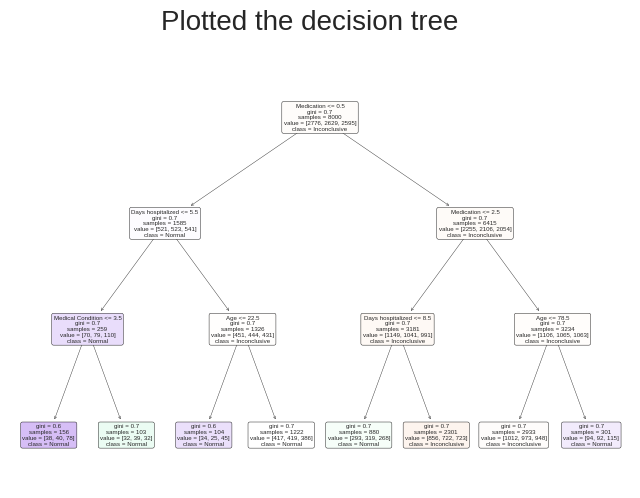

In [ ]:
# Visualisasi pohon keputusan
# Melatih kembali pohon keputusan dengan Max_depth = 3 agar pohon dapat ditampilkan dengan lebih baik

plt.figure(figsize=(100, 100)) # digunakan untuk memberikan ruang yang cukup agar pohon keputusan dapat divisualisasikan dengan baik.
fig, ax = plt.subplots(1, 1) # Membuat objek subplot dengan satu baris dan satu kolom.
fig.suptitle('Plotted the decision tree' , fontsize=20) # Menambahkan judul gambar dengan teks 'Menggambar pohon keputusan' dan ukuran font 20.
plt.style.use('seaborn') #Menggunakan gaya seaborn untuk plot.
dec_tree = plot_tree(decision_tree = DecisionTreeClassifier(max_depth=3).fit(X_train,y_train), feature_names = X.columns,
# Pohon keputusan dilatih kembali dengan kedalaman maksimum sebesar 3 agar lebih mudah divisualisasikan.
                   class_names = df['Test Results'], #Menyertakan nama kelas dalam visualisasi.
                   rounded = True,filled = True,precision = True)
# Memberikan atribut visual seperti pembulatan, warna, dan presisi pada visualisasi pohon keputusan

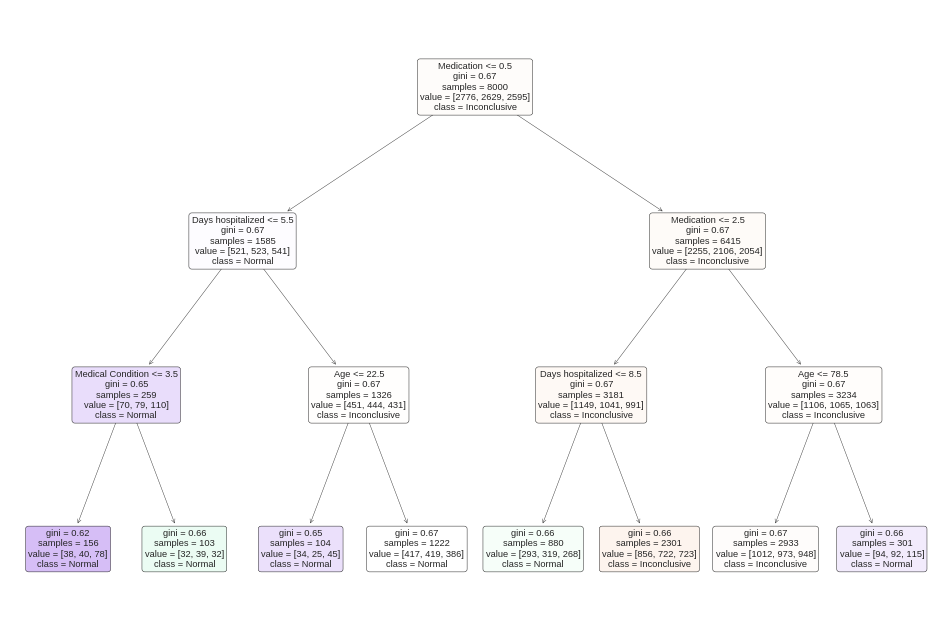

In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# Melatih kembali pohon keputusan dengan Max_depth = 3 agar pohon dapat ditampilkan dengan lebih baik
decision_tree = DecisionTreeClassifier(max_depth=3).fit(X_train, y_train)

# Visualisasi Decision Tree
plt.figure(figsize=(12, 8))
plot_tree(decision_tree, filled=True, feature_names=X.columns, class_names=df['Test Results'], rounded=True, precision=2)

# Menyimpan gambar plot pohon keputusan ke file
plt.savefig("decision_tree_plot.png")

# Menampilkan plot (opsional)
plt.show()


decision boundary

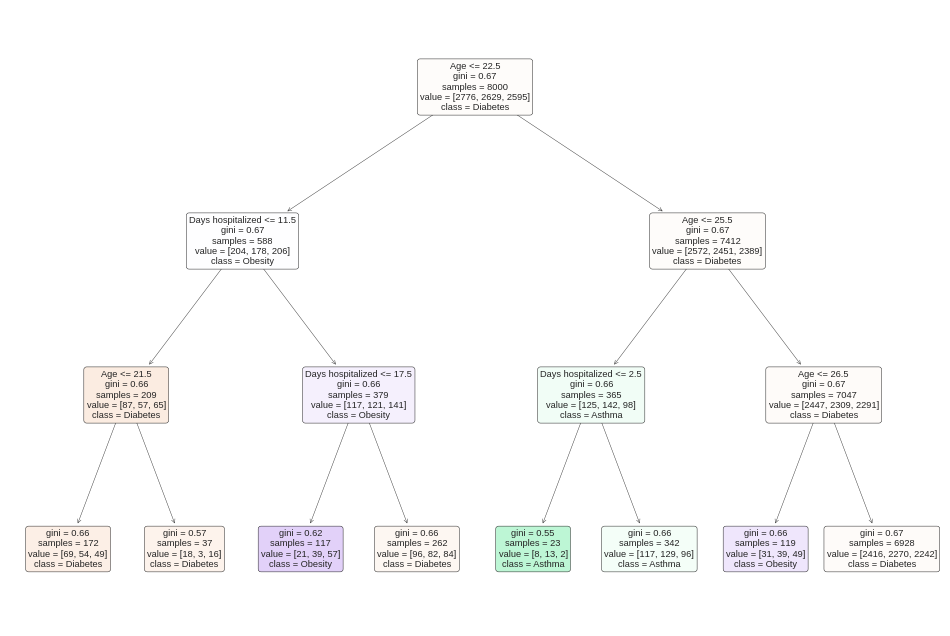

In [ ]:
# import library
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
import numpy as np

#persiapan data untuk visualisasi
features_for_visualization = ['Age', 'Days hospitalized']
X_visualization = X_train[features_for_visualization].values.astype(float)  # Convert to numpy array with float data type

# pelatihan model
model_visualization = DecisionTreeClassifier(max_depth=3)
model_visualization.fit(X_visualization, y_train)

# visualisasi dan simpan pohon keputusan
plt.figure(figsize=(12, 8))
plot_tree(model_visualization, filled=True, feature_names=features_for_visualization, class_names=df['Medical Condition'].unique(), rounded=True, precision=2)
plt.savefig("decision_tree_plot.png")

# menampilkan plot
plt.show()


## Random Forest

In [ ]:
# Import package
import pandas as pd # Pandas adalah library untuk manipulasi dan analisis data di Python
from matplotlib import pyplot as plt # digunakan untuk membuat visualisasi grafik.
from sklearn.model_selection import train_test_split # Fungsi ini digunakan untuk membagi data menjadi set pelatihan dan pengujian.
from sklearn.ensemble import RandomForestClassifier #  implementasi dari algoritma Random Forest untuk klasifikasi.
import seaborn as sns #library untuk membuat visualisasi data berdasarkan Matplotli

df = pd.read_csv('healthcare_dataset.csv')

In [ ]:
from sklearn.preprocessing import LabelEncoder #LabelEncoder digunakan untuk mengonversi data kategori menjadi data numerik.
for col in df.columns: #Memulai loop untuk setiap kolom dalam DataFrame df
    if col!='Age': #Menggunakan kondisi untuk memeriksa apakah nama kolom tidak sama dengan 'Age'.
        df[col]=lc.fit_transform(df[col]) #ika kondisi terpenuhi, maka melakukan transformasi Label Encoding pada kolom tersebut menggunakan fit_transform.
df.head() #Menampilkan lima baris pertama dari DataFrame df setelah transformasi.

In [ ]:
X,y=df.drop(['Test Results'],axis=1), df['Test Results']
# Variabel independen adalah DataFrame df tanpa kolom 'Test Results', dan variabel dependen adalah kolom 'Test Results'.
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)
# Membagi data menjadi Data Pelatihan (X_train, y_train) dan Data Uji (X_test, y_test)

X_train.shape, y_test.shape # Menampilkan bentuk (shape) dari Data Pelatihan (X_train) dan label Data Uji (y_test).

rfc = RandomForestClassifier(n_estimators=100) #Membuat objek model RandomForestClassifier dengan 100 pohon keputusan.
rfc.fit(X_train,y_train) # Melatih model menggunakan Data Pelatihan (X_train, y_train).
rfc.score(X_test,y_test) # Menggunakan model yang telah dilatih untuk menghitung dan menampilkan skor akurasi pada Data Uji.

Skor akurasi yang didapat adalah 0.315

In [ ]:
from sklearn.svm import SVC #  Mengimpor kelas SVC (Support Vector Classifier) dari library scikit-learn.
svm = SVC() # Membuat objek model SVM.
svm.fit(X_train,y_train) # Melatih model SVM menggunakan Data Pelatihan (X_train, y_train).
svm.score(X_test,y_test) # Menghitung dan menampilkan skor akurasi pada Data Uji

Pada metode SVC, nilai akurasinya 0.3385

In [ ]:
from sklearn.naive_bayes import BernoulliNB # Mengimpor kelas BernoulliNB (Naive Bayes classifier untuk data Bernoulli)
bnb = BernoulliNB() # Membuat objek model Naive Bayes dengan distribusi Bernoulli.
bnb.fit(X_train,y_train) # Melatih model Naive Bayes menggunakan Data Pelatihan (X_train, y_train).
bnb.score(X_test,y_test) # Menghitung dan menampilkan skor akurasi pada Data Uji.

Pada metode Bernoulli, nilai akurasinya 0.3545

In [ ]:
from sklearn.linear_model import LogisticRegression # Mengimpor kelas LogisticRegression dari library scikit-learn.
lr = LogisticRegression() # Membuat objek model Regresi Logistik.
lr.fit(X_train,y_train) # Melatih model Regresi Logistik menggunakan Data Pelatihan (X_train, y_train).
lr.score(X_test,y_test) # Menghitung dan menampilkan skor akurasi pada Data Uji.

Pada metode Regresi Logistik, nilai akurasinya 0.3355

In [ ]:
import seaborn as sns # Mengimpor library Seaborn untuk visualisasi data statistik.
import matplotlib.pyplot as plt # Mengimpor modul pyplot dari library Matplotlib untuk membuat visualisasi grafik.

corr_matrix = df.corr() # Mengimpor modul pyplot dari library Matplotlib untuk membuat visualisasi grafik.

plt.figure(figsize=(10, 8)) # Membuat figur (gambar) dengan ukuran 10x8 inci menggunakan Matplotlib.
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f") # Membuat heatmap dengan menggunakan Seaborn
plt.title('Correlation Heatmap') # Menambahkan judul ke heatmap.
plt.show() # Menampilkan heatmap.

Visualisasi diatas merupakan Correlation Heatmap, dimana ditampilkan tingkat korelasi antara setiap atributnya.
Warna merah memiliki arti bahwa korelasinya bernilai 1 yang menunjukkan hubungan linear positive sempurna.

In [ ]:
# Mengimpor XGBClassifier dari library xgboost dan beberapa metrik evaluasi dari scikit-learn
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Membagi data menjadi set pelatihan dan pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Membuat classifier XGBoost
model = XGBClassifier()

# Melatih model pada data pelatihan
model.fit(X_train, y_train)

# Melakukan prediksi pada data uji
y_pred = model.predict(X_test)

# Evaluasi model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Menampilkan laporan klasifikasi dan matriks kebingungan
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


In [ ]:
import seaborn as sns # Mengimpor library Seaborn untuk visualisasi data statistik
import matplotlib.pyplot as plt # Mengimpor modul pyplot dari library Matplotlib untuk membuat visualisasi grafik.
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test, y_pred) # Mengimpor fungsi confusion_matrix dari scikit-learn untuk menghitung matriks kebingungan.

plt.figure(figsize=(8, 6)) #Membuat figur (gambar) dengan ukuran 8x6 inci menggunakan Matplotlib.
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap='Blues', cbar=False, # Membuat heatmap dengan menggunakan Seaborn
            xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted') # Menambahkan label pada sumbu x dan y.
plt.ylabel('Actual') # Menambahkan label pada sumbu x dan y.
plt.title('Confusion Matrix') # Menambahkan judul pada heatmap.
plt.show() # Menampilkan heatmap.

decision boundary

In [ ]:
# import library
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

# persiapan untuk data visualisasi
features_for_visualization = ['Age', 'Billing Amount']
X_visualization, y_visualization = make_classification(n_samples=1000, n_features=2, n_informative=2,
                                                       n_redundant=0, n_clusters_per_class=1, random_state=42)

# membuat meshgrid
x_min, x_max = X_visualization[:, 0].min() - 1, X_visualization[:, 0].max() + 1
y_min, y_max = X_visualization[:, 1].min() - 1, X_visualization[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

# pelatihan model random forest classifier
rfc_visualization = RandomForestClassifier(n_estimators=100, random_state=42)
rfc_visualization.fit(X_visualization, y_visualization)

# Prediksi Kelas pada Meshgrid
Z = rfc_visualization.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot Decision Boundary dan Scatter Plot Data
plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')
plt.scatter(X_visualization[:, 0], X_visualization[:, 1], c=y_visualization, cmap='coolwarm', edgecolors='k', s=20)
plt.title('Decision Boundary of Random Forest Classifier')
plt.xlabel('Age')
plt.ylabel('Billing Amount')
plt.show()


Dari visualisasi tersebut menunjukkan sumbu x yang mewakili "Age" dan sumbu Y yang mewakili "Billing Amount". Pada klasifikasi ini, kelas terbagi menjadi dua yang masing-masing ditampilkan oleh warna merah maupun biru, kelas-kelas ini dipisahkan oleh batas keputusan sehingga pengelompokkan kelas merah sebagian besar berada di sudut kiri atas sedangkan kelas biru disudut kanan bawah.

## NEURAL NETWORK

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

# Membaca dataset
df = pd.read_csv("healthcare_dataset.csv")

# Menentukan fitur dan target
features = ["Age", "Gender", "Billing Amount", "Room Number"]
target = "Medical Condition"

# Mengambil subset dataset dengan fitur dan target yang ditentukan
data = df[features + [target]]

# Menggunakan LabelEncoder untuk mengonversi data kategorikal menjadi numerik
le_gender = LabelEncoder()
data["Gender"] = le_gender.fit_transform(data["Gender"])

# Membuat kolom baru untuk mengkodekan kondisi medis menjadi biner (1: memiliki kondisi medis, 0: tidak memiliki kondisi medis)
data["Medical Condition"] = data["Medical Condition"].apply(lambda x: 1 if x != "No Medical Condition" else 0)

# Memisahkan data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(data[features], data[target], test_size=0.2, random_state=42)

# Standardisasi fitur menggunakan StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Model Neural Network
nn_model = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=500, random_state=42)
nn_model.fit(X_train_scaled, y_train)
nn_predictions = nn_model.predict(X_test_scaled)

# Evaluasi performa model
print("Neural Network Accuracy:", accuracy_score(y_test, nn_predictions))


Metode Neural Network menunjukkan angka akurasi yang tinggi yaitu 1.0 yang berarti hampir semua prediksi bernilai benar.

decision boundary

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Konversi Label ke Numerik menggunakan LabelEncoder
le_condition = LabelEncoder()
y_test_numeric = le_condition.fit_transform(y_test)

# Membuat Meshgrid untuk Visualisasi Decision Boundary
x_min, x_max = X_test_scaled[:, 0].min() - 1, X_test_scaled[:, 0].max() + 1
y_min, y_max = X_test_scaled[:, 1].min() - 1, X_test_scaled[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

# Pelatihan Model Neural Network dengan Dua Fitur
nn_model_2d = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=500, random_state=42)
nn_model_2d.fit(X_train_scaled[:, :2], y_train)

# Prediksi Kelas pada Meshgrid
Z = nn_model_2d.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary
plt.contourf(xx, yy, Z, alpha=0.3)

# Scatter Plot Data dengan Warna Berdasarkan Label Numerik
scatter = plt.scatter(X_test_scaled[:, 0], X_test_scaled[:, 1], c=y_test_numeric, cmap=plt.cm.coolwarm, edgecolors='k')

# Tambahkan Legenda Berdasarkan Label Asli 'Medical Condition'
plt.legend(*scatter.legend_elements(), title="Medical Condition")

plt.title('Decision Boundary of Neural Network Classifier (2D)')
plt.xlabel('Feature 1 (Standardized)')
plt.ylabel('Feature 2 (Standardized)')

plt.show()


Dari visualisasi tersebut menunjukkan sumbu x yang berlabel "Feature 1" dan sumbu Y yang mewakili "Feature 2". Pada klasifikasi ini, kelas terbagi menjadi dua yang masing-masing mempresentasikan kondisi medis yang berbeda, kelas-kelas ini dipisahkan oleh batas keputusan.

### SVM

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Membaca dataset
# Gantilah nama_file.csv dengan nama file sebenarnya dan sesuaikan path jika perlu
df = pd.read_csv("healthcare_dataset.csv")

# Menentukan fitur dan target
features = ["Age", "Billing Amount", "Room Number"]
target = "Medical Condition"

# Mengambil subset dataset dengan fitur dan target yang ditentukan
data = df[features + [target]]

# Menggunakan LabelEncoder untuk mengonversi data kategorikal menjadi numerik
# Jika Gender, Blood Type, atau Admission Type adalah variabel kategorikal, kita perlu melakukan encoding
# Memastikan bahwa kolom "Gender" ada dalam dataset
if "Gender" in df.columns:
    # Menggunakan LabelEncoder untuk mengonversi data kategorikal menjadi numerik
    le_gender = LabelEncoder()
    df["Gender"] = le_gender.fit_transform(df["Gender"])
else:
    print("Column 'Gender' not found in the dataset.")

# Memisahkan data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(data[features], data[target], test_size=0.2, random_state=42)

# Standardisasi fitur menggunakan StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Model SVM
svm_model = SVC(kernel='linear', C=1.0, probability=True, random_state=42)
svm_model.fit(X_train_scaled, y_train)
svm_predictions = svm_model.predict(X_test_scaled)

# Evaluasi performa model
print("SVM Accuracy:", accuracy_score(y_test, svm_predictions))
print("\nClassification Report:\n", classification_report(y_test, svm_predictions))


Metode SVM memiliki nilai akurasi yang cukup rendah yaitu 0.168

# Kesimpulan
Setelah melakukan berbagai metode, nilai akurasi yang didapat pada Decision Tree sebesar 0.3415, Random Forest 0.315, Neural Network 1.0 dan SVM 0.16. Sehingga Neurall Network merupakan metode terbaik berdasarkan nilai akurasi.

Selain itu, jika dilihat melalui Decision Boundary, Neural Network juga memiliki klasifikasi terbaik diantara metode-metode lain dimana masing-masing kelas tidak saling bercampur.

Sehingga dapat disimpulkan bahwa Neurall Network adalah metode terbaik baik berdasarkan nilai akurasi maupun batas keputusan.